In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('diamonds.csv')

In [3]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
data_1 = pd.read_csv('diamonds.csv')

In [5]:
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


# data preprocessing

In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### finding the correlation

In [7]:
#Ordinal Encoding for Cut
from sklearn.preprocessing import OrdinalEncoder

# Define the order explicitly
cut_order = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]

# Create encoder and fit
encoder = OrdinalEncoder(categories=cut_order)
data = data.copy()
data['cut_encoded'] = encoder.fit_transform(data[['cut']])
data.drop('cut',axis=1,inplace=True)

In [8]:
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
ordinal_encoder = OrdinalEncoder(categories=[clarity_order])
data['clarity_encoded'] = ordinal_encoder.fit_transform(data[['clarity']])
data.drop('clarity',axis=1,inplace=True)

In [9]:
#One hot encoding for colour
data = pd.get_dummies(data, columns=['color'], drop_first=True)

In [10]:
correlations = data.corr()['price'].drop('price') #corr amongst the data points mpg(dependent variable) depends on
most_correlated = correlations.abs().sort_values(ascending=False)
print("Most correlated variables with mpg:\n", most_correlated)

Most correlated variables with mpg:
 carat              0.921591
x                  0.884435
y                  0.865421
z                  0.861249
clarity_encoded    0.146800
table              0.127134
color_E            0.101089
color_I            0.097125
color_J            0.081710
color_H            0.059223
cut_encoded        0.053491
color_F            0.024161
depth              0.010647
color_G            0.008556
Name: price, dtype: float64


In [11]:
### checking for null values
data.isnull().sum()

carat              0
depth              0
table              0
price              0
x                  0
y                  0
z                  0
cut_encoded        0
clarity_encoded    0
color_E            0
color_F            0
color_G            0
color_H            0
color_I            0
color_J            0
dtype: int64

In [12]:
data.duplicated().sum()

146

In [13]:
data.drop_duplicates(subset=None, keep='first', inplace=False)

,carat,depth,table,price,x,y,z,cut_encoded,clarity_encoded,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,4.0,1.0,True,False,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3.0,2.0,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,4.0,True,False,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3.0,3.0,False,False,False,False,True,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,1.0,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,4.0,2.0,False,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1.0,2.0,False,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,2.0,2.0,False,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,3.0,1.0,False,False,False,True,False,False


# outliers testing

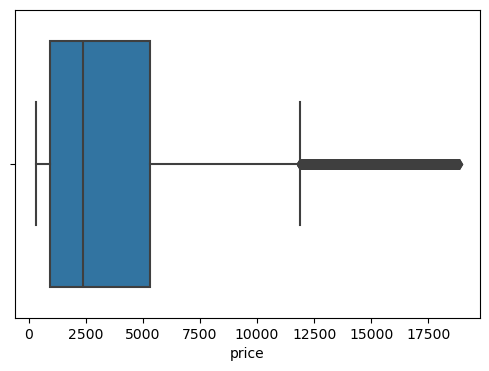

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['price'])
plt.show()

In [32]:
q1 = data_no_outliers['price'].quantile(0.25)
q3 = data_no_outliers['price'].quantile(0.75)

In [33]:
iqr = q3 - q1
lower_b = q1 - 1.5 * iqr
upper_b = q3 + 1.5 * iqr

In [20]:
data_no_outliers = data[~((data['price'] < lower_b) | (data['price'] > upper_b))]

In [34]:
data_no_outliers = data_no_outliers[~((data_no_outliers['price'] < lower_b) | (data_no_outliers['price'] > upper_b))]

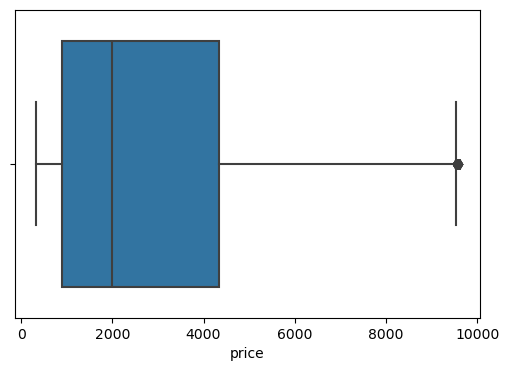

In [35]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data_no_outliers['price'])
plt.show()

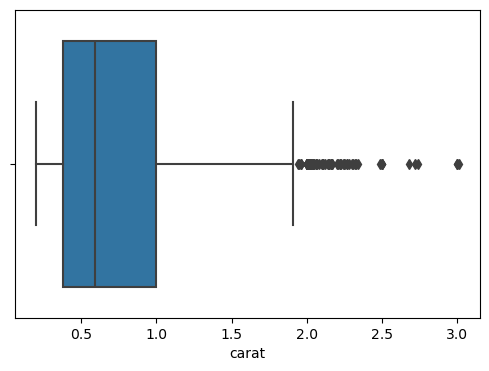

In [36]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data_no_outliers['carat'])
plt.show() #checking for outliers

In [37]:
q1 = data_no_outliers['carat'].quantile(0.25)
q3 = data_no_outliers['carat'].quantile(0.75)

In [38]:
iqr = q3 - q1
lower_b = q1 - 1.5 * iqr
upper_b = q3 + 1.5 * iqr

In [39]:
data_no_outliers = data_no_outliers[~((data_no_outliers['carat'] < lower_b) | (data_no_outliers['carat'] > upper_b))]

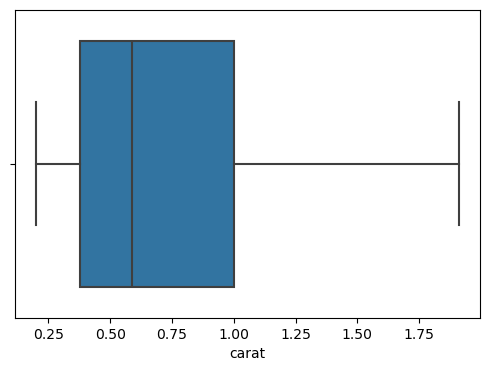

In [40]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data_no_outliers['carat'])
plt.show() #checking for outliers

In [41]:
data_no_outliers.dtypes

carat              float64
depth              float64
table              float64
price                int64
x                  float64
y                  float64
z                  float64
cut_encoded        float64
clarity_encoded    float64
color_E               bool
color_F               bool
color_G               bool
color_H               bool
color_I               bool
color_J               bool
dtype: object

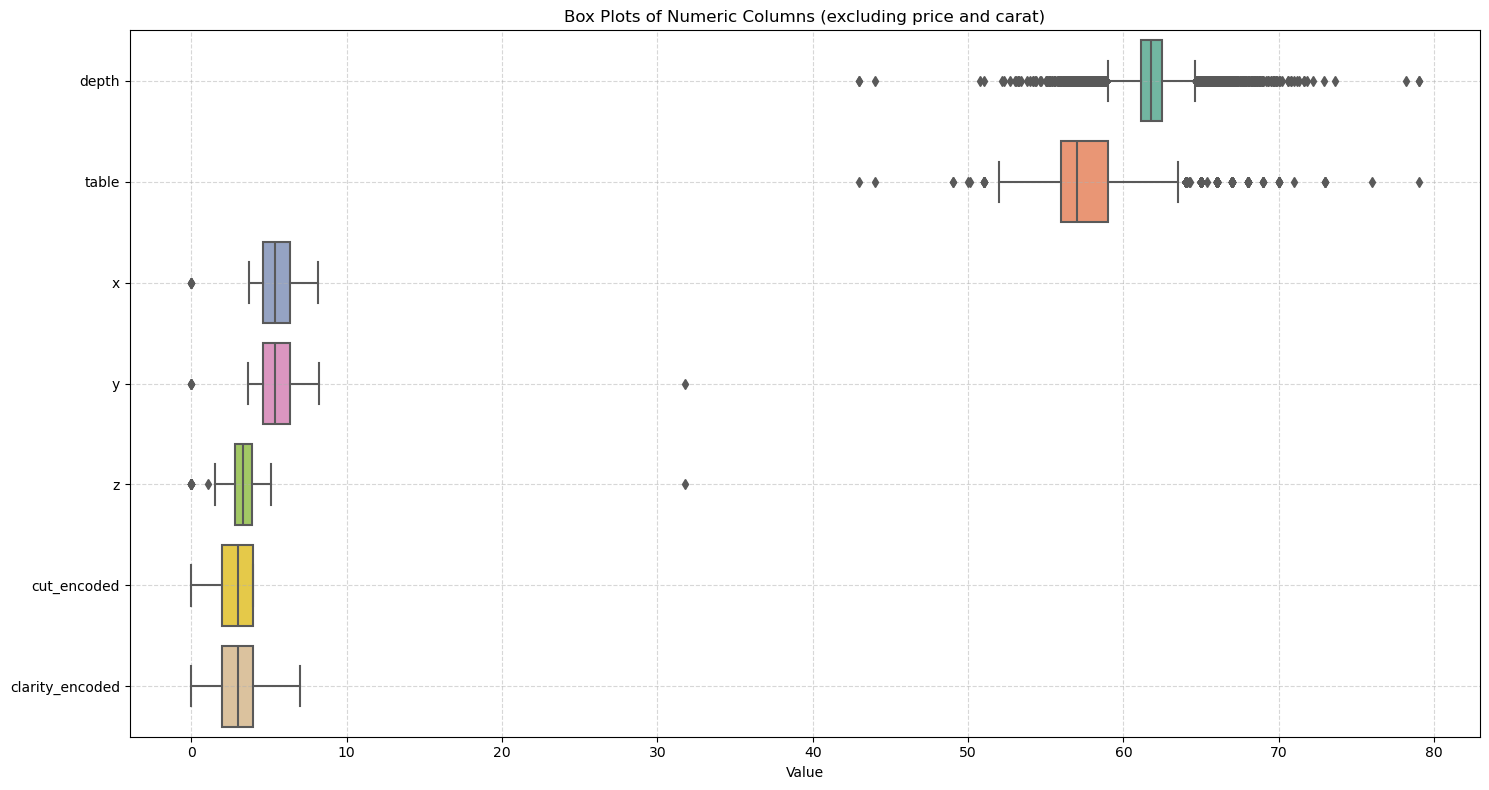

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = data_no_outliers.select_dtypes(include=['float', 'int'])
numeric_cols = numeric_cols.drop(['price', 'carat'], axis=1)

# Plot boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_cols, orient='h', palette='Set2')
plt.title('Box Plots of Numeric Columns (excluding price and carat)')
plt.xlabel('Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [44]:
q1 = data_no_outliers['depth'].quantile(0.25)
q3 = data_no_outliers['depth'].quantile(0.75)

iqr = q3 - q1
lower_b = q1 - 1.5 * iqr
upper_b = q3 + 1.5 * iqr

data_no_outliers = data_no_outliers[~((data_no_outliers['depth'] < lower_b) | (data_no_outliers['depth'] > upper_b))]

In [52]:
q1 = data_no_outliers['table'].quantile(0.25)
q3 = data_no_outliers['table'].quantile(0.75)

iqr = q3 - q1
lower_b = q1 - 1.5 * iqr
upper_b = q3 + 1.5 * iqr

data_no_outliers = data_no_outliers[~((data_no_outliers['table'] < lower_b) | (data_no_outliers['table'] > upper_b))]

In [50]:
q1 = data_no_outliers['y'].quantile(0.25)
q3 = data_no_outliers['y'].quantile(0.75)

iqr = q3 - q1
lower_b = q1 - 1.5 * iqr
upper_b = q3 + 1.5 * iqr

data_no_outliers = data_no_outliers[~((data_no_outliers['y'] < lower_b) | (data_no_outliers['y'] > upper_b))]

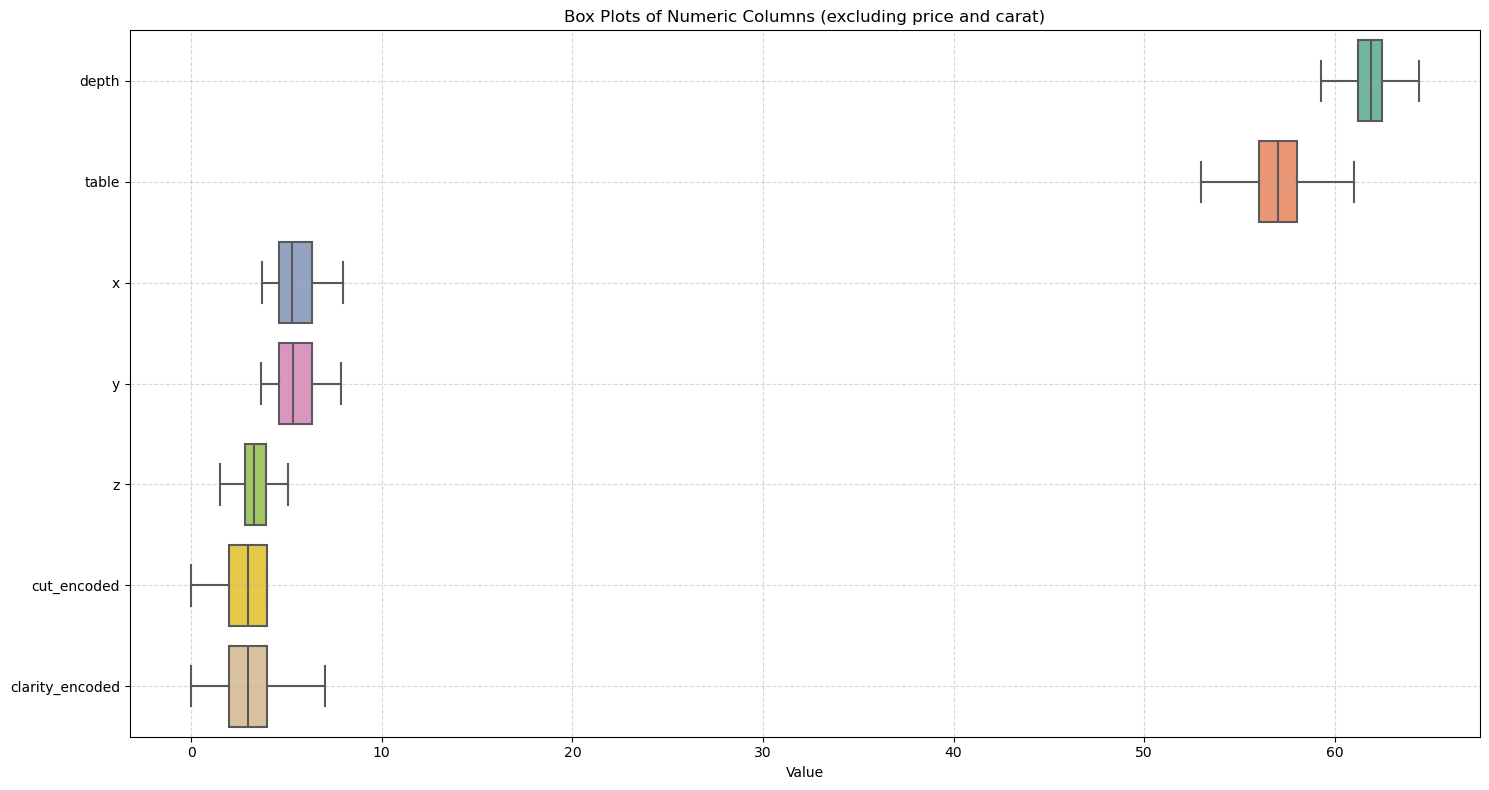

In [53]:
numeric_cols = data_no_outliers.select_dtypes(include=['float', 'int'])
numeric_cols = numeric_cols.drop(['price', 'carat'], axis=1)

# Plot boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=numeric_cols, orient='h', palette='Set2')
plt.title('Box Plots of Numeric Columns (excluding price and carat)')
plt.xlabel('Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


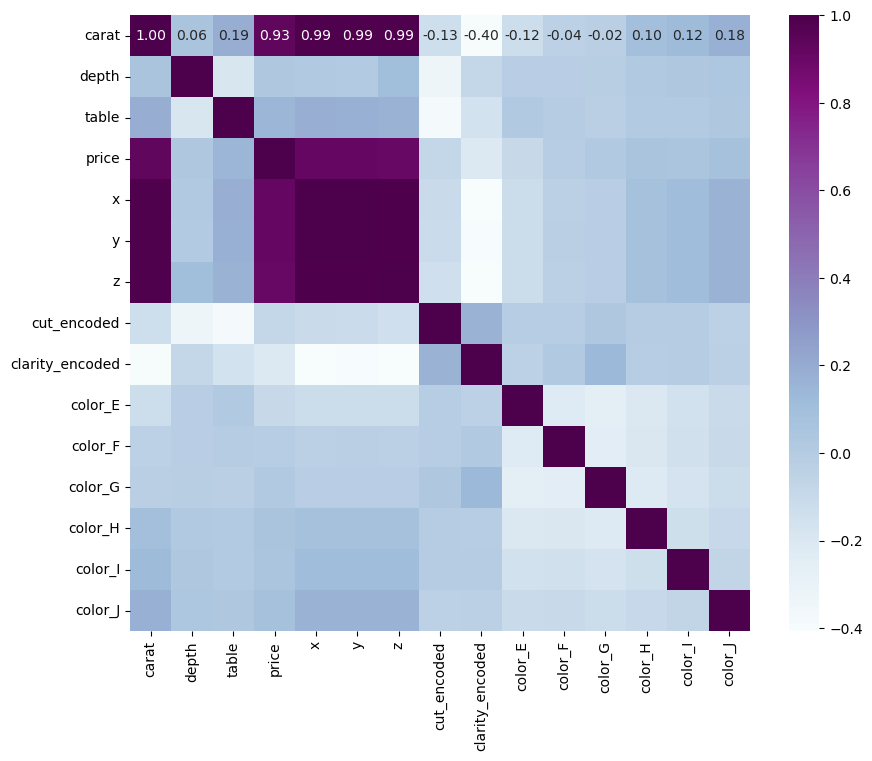

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data_no_outliers.corr(), annot=True, cmap='BuPu', fmt=".2f")
plt.show()

In [55]:
correlations = data_no_outliers.corr()['price'].drop('price') #corr amongst the data points mpg(dependent variable) depends on
most_correlated = correlations.abs().sort_values(ascending=False)
print("Most correlated variables with price:\n", most_correlated)

Most correlated variables with price:
 carat              0.931450
y                  0.914450
x                  0.913844
z                  0.911246
clarity_encoded    0.203779
table              0.149917
color_E            0.093720
color_J            0.085286
cut_encoded        0.080309
color_H            0.058109
color_I            0.053747
depth              0.027667
color_G            0.021704
color_F            0.008230
Name: price, dtype: float64


# NULL HYPOTHESIS

In [56]:
data_no_outliers.dtypes

carat              float64
depth              float64
table              float64
price                int64
x                  float64
y                  float64
z                  float64
cut_encoded        float64
clarity_encoded    float64
color_E               bool
color_F               bool
color_G               bool
color_H               bool
color_I               bool
color_J               bool
dtype: object

In [57]:
#annova test
from scipy.stats import f_oneway

# Step 1: Group data by the categorical variable
groups = data_no_outliers.groupby('cut_encoded')['price'].apply(list) #try on color carat

# Step 2: Apply ANOVA test
anova_result = f_oneway(*groups)

# Step 3: Display the F-statistic and p-value
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Step 4: Interpret result
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis – Mean price differs accross the cut types.")
else:
    print(" Fail to reject the null – Mean price is constant across the cut types.")

F-statistic: 135.5259514057883
P-value: 2.779178880893513e-115
Reject the null hypothesis – Mean price differs accross the cut types.


# EDA - UNIVARIATE

In [58]:
sns.set(style="darkgrid")

In [59]:
#price
data_no_outliers['price'].describe()

count    43293.000000
mean      2778.886679
std       2333.823827
min        326.000000
25%        863.000000
50%       1872.000000
75%       4301.000000
max       9596.000000
Name: price, dtype: float64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


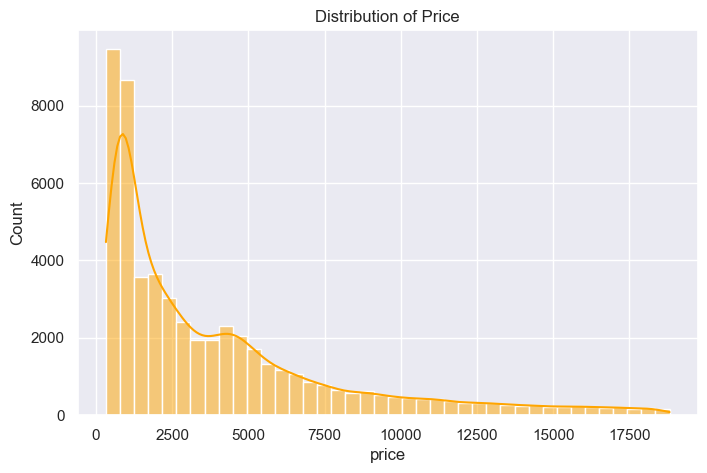

In [60]:
plt.figure(figsize=(8, 5))
sns.histplot(data['price'], kde=True, bins=40,color='orange')
plt.title('Distribution of Price')
plt.show()

In [61]:
data['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


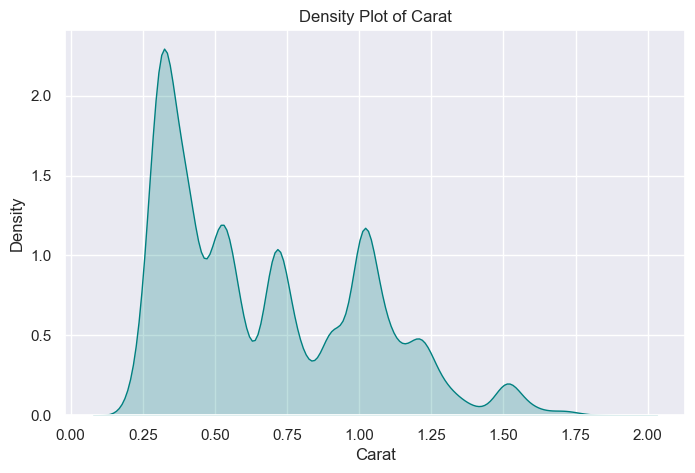

In [62]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data_no_outliers['carat'], fill=True, color='teal')
plt.title('Density Plot of Carat')
plt.xlabel('Carat')
plt.ylabel('Density')
plt.grid(True)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


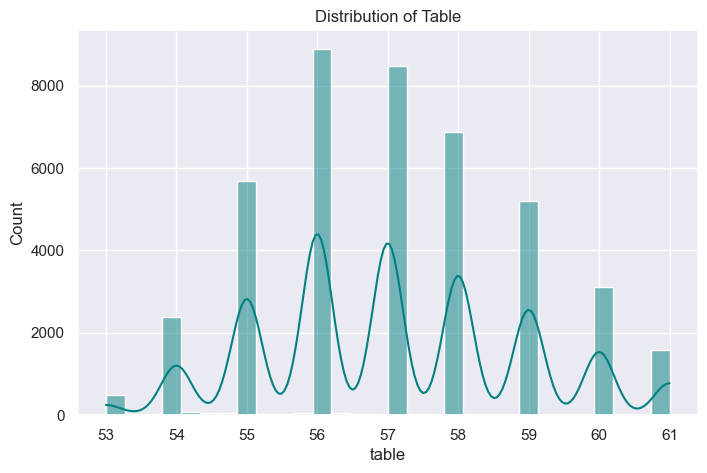

In [63]:
plt.figure(figsize=(8, 5))
sns.histplot(data_no_outliers['table'], kde=True, bins=30,color='teal')
plt.title('Distribution of Table')
plt.show()


In [64]:
#Univariate Categorical variable
data_no_outliers['cut_encoded'].value_counts()

cut_encoded
4.0    19530
3.0    10718
2.0     9734
1.0     3201
0.0      110
Name: count, dtype: int64

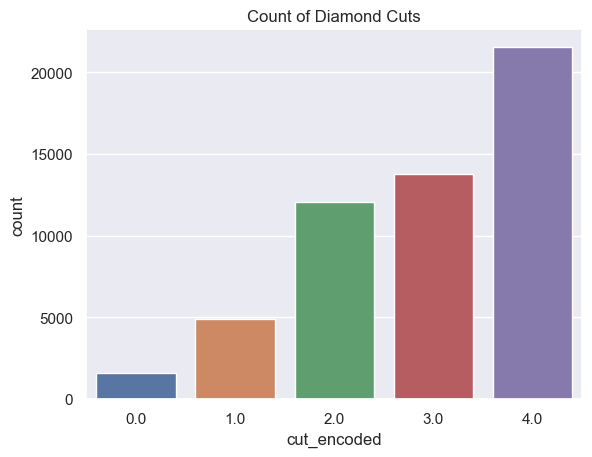

In [65]:
sns.countplot(data=data, x='cut_encoded')
plt.title('Count of Diamond Cuts')
plt.show()

# EDA - BIVARIATE

In [66]:
correlation = data_no_outliers['price'].corr(data_no_outliers['carat'])
correlation

0.9314503629860952

In [67]:
data_no_outliers.groupby(['cut_encoded', 'carat'])['price'].mean()

cut_encoded  carat
0.0          0.25      563.00
             0.30      799.00
             0.31      740.00
             0.32     1076.00
             0.37     1440.00
                       ...   
4.0          1.75     7801.25
             1.76     9540.00
             1.77     7771.00
             1.80     8630.50
             1.84     8828.00
Name: price, Length: 663, dtype: float64

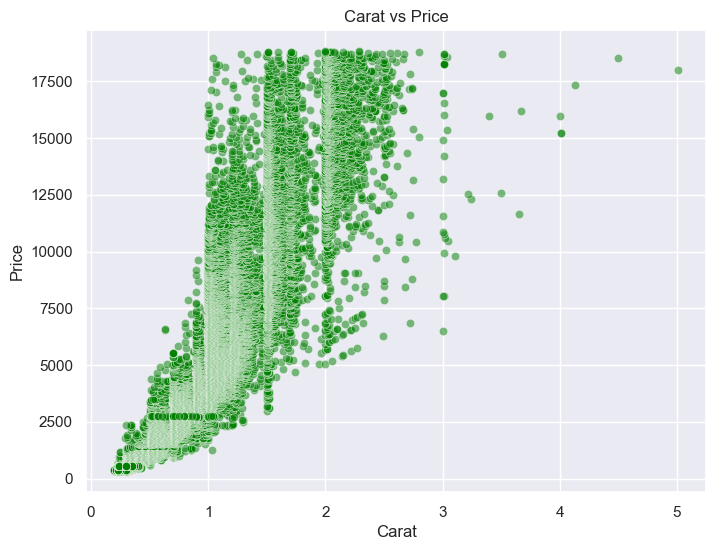

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='carat', y='price', alpha=0.5, color='green')
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

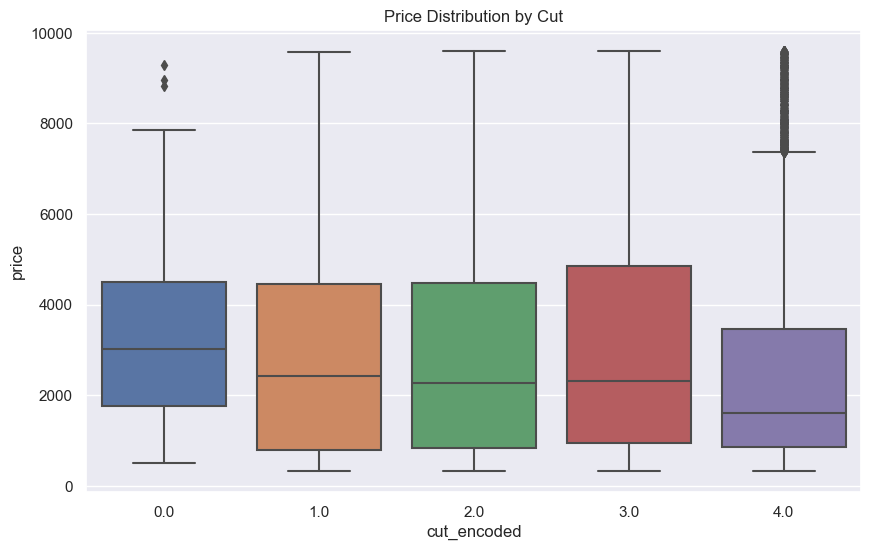

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_no_outliers, x='cut_encoded', y='price')
plt.title('Price Distribution by Cut')
plt.show()

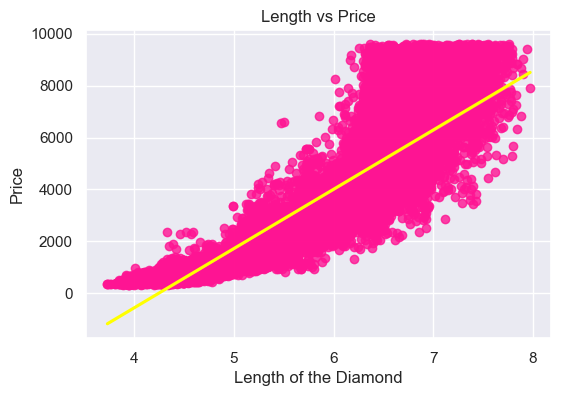

In [70]:
plt.figure(figsize=(6, 4))
sns.regplot(x='x', y='price', data=data_no_outliers, scatter_kws={"color": "deeppink"}, line_kws={"color": "yellow"})
plt.title('Length vs Price')
plt.xlabel('Length of the Diamond')
plt.ylabel('Price')
plt.show()

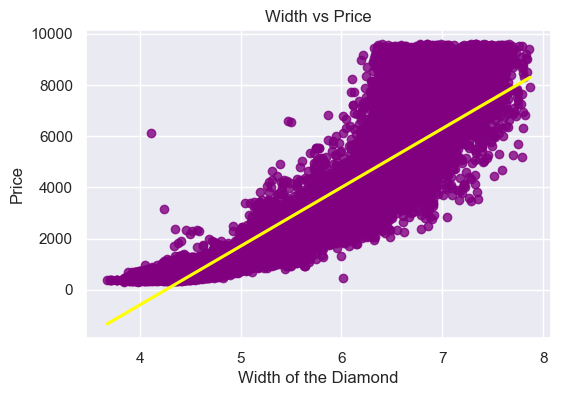

In [71]:
plt.figure(figsize=(6, 4))
sns.regplot(x='y', y='price', data=data_no_outliers, scatter_kws={"color": "purple"}, line_kws={"color": "yellow"})
plt.title('Width vs Price')
plt.xlabel('Width of the Diamond')
plt.ylabel('Price')
plt.show()

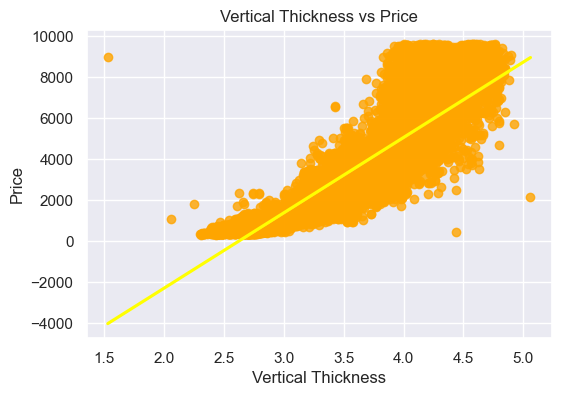

In [72]:
plt.figure(figsize=(6, 4))
sns.regplot(x='z', y='price', data=data_no_outliers, scatter_kws={"color": "orange"}, line_kws={"color": "yellow"})
plt.title('Vertical Thickness vs Price')
plt.xlabel('Vertical Thickness')
plt.ylabel('Price')
plt.show()

# EDA - MULTI VARIATE

In [73]:
data_no_outliers.groupby(['cut_encoded', 'color_E','color_F','color_G','color_H','color_I','color_J']).size().reset_index(name='count')

,cut_encoded,color_E,color_F,color_G,color_H,color_I,color_J,count
0,0.0,False,False,False,False,False,False,17
1,0.0,False,False,False,False,False,True,7
2,0.0,False,False,False,False,True,False,5
3,0.0,False,False,False,True,False,False,24
4,0.0,False,False,True,False,False,False,23
5,0.0,False,True,False,False,False,False,23
6,0.0,True,False,False,False,False,False,11
7,1.0,False,False,False,False,False,False,434
8,1.0,False,False,False,False,False,True,200
9,1.0,False,False,False,False,True,False,320


In [74]:
data_no_outliers[['carat', 'price', 'depth', 'cut_encoded']].corr()

,carat,price,depth,cut_encoded
carat,1.000000,0.931450,0.056199,-0.130767
price,0.931450,1.000000,0.027667,-0.080309
depth,0.056199,0.027667,1.000000,-0.325905
cut_encoded,-0.130767,-0.080309,-0.325905,1.000000


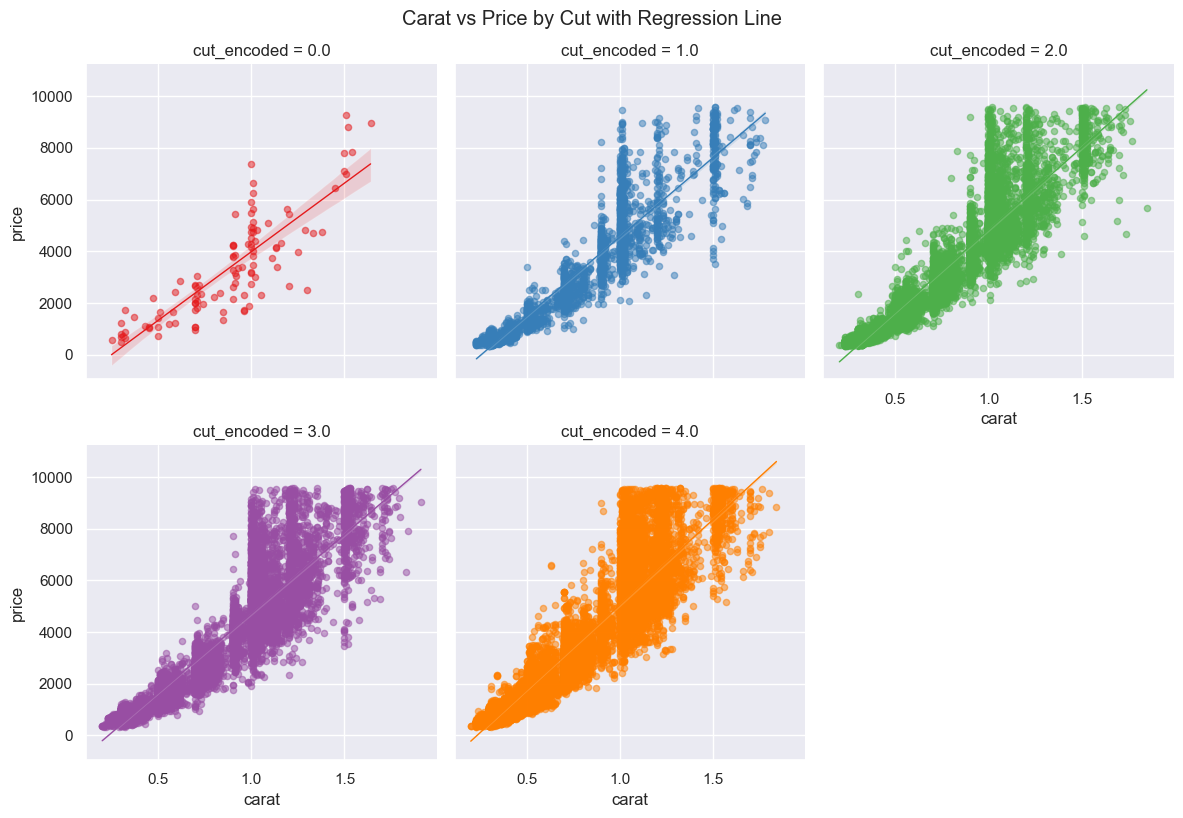

In [75]:
sns.lmplot(
    data=data_no_outliers,
    x='carat',
    y='price',
    col='cut_encoded',
    hue='cut_encoded',
    col_wrap=3,
    palette='Set1',
    height=4,
    scatter_kws={'alpha':0.5, 's':20},
    line_kws={'linewidth':1}
)
plt.suptitle('Carat vs Price by Cut with Regression Line', y=1.02)
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

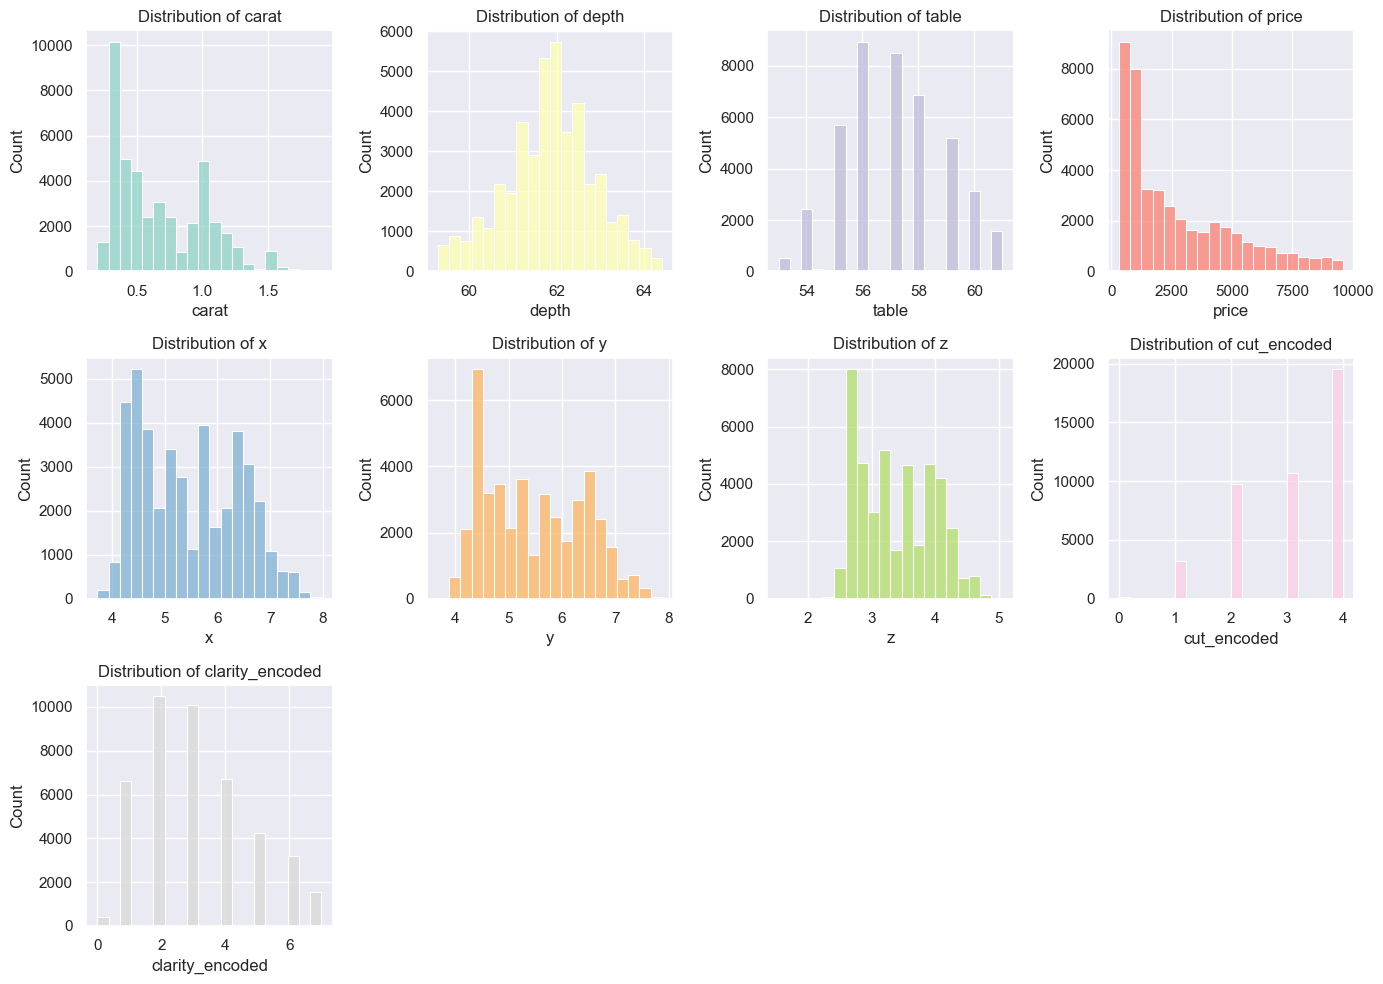

In [76]:
colors = sns.color_palette("Set3", n_colors=len(data_no_outliers.columns))
df_no_outliers_cols = data_no_outliers.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(df_no_outliers_cols):
    sns.histplot(data_no_outliers[col], ax=axes[i], color=colors[i], bins=20)
    axes[i].set_title(f'Distribution of {col}')

#removing the grid columns with no data
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### SCALING

In [77]:
X = data_no_outliers.drop('price', axis=1)
y = data_no_outliers['price']

In [92]:
X = data_no_outliers.drop('price', axis=1)
y = data_no_outliers['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features & target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).ravel()

In [94]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    'C': loguniform(1e-2, 1e3),
    'gamma': loguniform(1e-4, 1e-1),
    'epsilon': [0.01, 0.1, 0.5]
}

svr = SVR(kernel='rbf')
rand_svr = RandomizedSearchCV(
    svr,
    param_distributions=param_dist,
    n_iter=20,      # try 20 random combos
    cv=3,           # 3-fold CV
    scoring='r2',
    n_jobs=-1,      # parallelize
    verbose=2
)

rand_svr.fit(X_train, y_train)
print("Best params:", rand_svr.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'C': 182.91943955505934, 'epsilon': 0.5, 'gamma': 0.0008254293799476008}


In [97]:
y_pred = best_svr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned SVR MSE:", mse)
print("Tuned SVR R²:", r2)

Tuned SVR MSE: 827910.1989696905
Tuned SVR R²: 0.8465268641612118


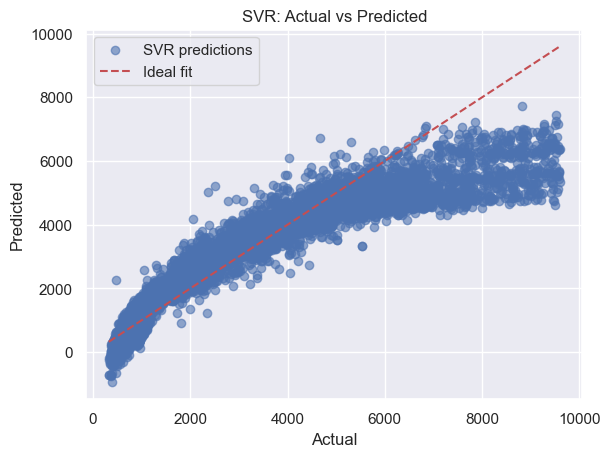

In [98]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6, label='SVR predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Actual vs Predicted')
plt.legend()
plt.show()


### RANDOM FOREST

In [81]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling numerical features (important for SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R²: 0.8405867194624121
MSE: 859954.2850738403
MAE: 634.349114348308


In [83]:
importances = rf.feature_importances_
features = data_no_outliers.drop('price', axis=1).columns
pd.Series(importances, index=features).sort_values(ascending=False).head(10)


carat              0.842302
y                  0.082380
x                  0.075318
depth              0.000000
table              0.000000
z                  0.000000
cut_encoded        0.000000
clarity_encoded    0.000000
color_E            0.000000
color_F            0.000000
dtype: float64

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("Best params:", grid.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [90]:
y_pred_tuned = best_rf.predict(X_test)
print("Tuned R²:", r2_score(y_test, y_pred_tuned))
print("Tuned RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tuned)))
print("Tuned MAE:", mean_absolute_error(y_test, y_pred_tuned))


Tuned R²: 0.9822610265858376
Tuned RMSE: 309.342559305608
Tuned MAE: 175.53758947622282


In [96]:
best_svr = rand_svr.best_estimator_

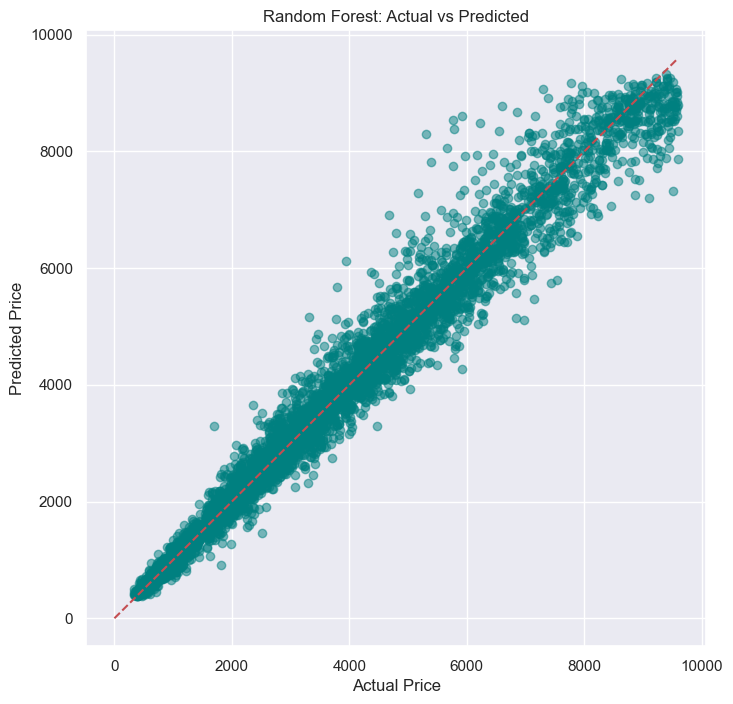

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_tuned, alpha=0.5, color='teal')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


In [85]:
import joblib
joblib.dump(rf, 'model_diamonds.pkl')
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

['model_columns.pkl']